<a href="https://colab.research.google.com/github/carmenscar/Mind_lab_data/blob/master/analisecovidbsb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


#Análise dos dados - COVID - Brasília
**ÚLTIMA ATUALIZAÇÃO 24/07/2020**

O Distrito Federal foi um dos entes da federação que começaram cedo com as medidas de isolamento social. 

Passados 3 meses desde o primeiro caso de covid na capital, na primeira semana de março, Brasília tem forte queda nas taxas de isolamento social.

O governo julga seguro a retomada das atividades e está gradativamente liberando a reabertura, com algumas restrições, do comércio essencial, dos parques, dos clubes e das igrejas, deixando por último a reabertura de bares, restaurantes e academias, consideradas atividades não essenciais.

Diante do cenário, analisaremos os dados sobre o **corona vírus** e veremos quais informações podemos extrair dos dados brutos disponibilizados pelo governo do Distrito Federal.

O estudo será atualizado semanalmente.


##Obtenção de dados
Os utilizados na presente análise foram extraídos do [site do GDF](https://covid19.ssp.df.gov.br/extensions/covid19/covid19.html#/) destinado às informações referentes ao **COVID**.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import datetime as dt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_excel('/content/dados-abertos.xlsx')

## Dicionário de variáveis
* id - número gerado para identificar o paciente
* Sexo - gênero do paciente
* Faixa etária - faixa de idade do paciente
* Estado de saúde - estado que se encontra o paciente identificado
* Comorbidades - identifica se o paciente possui comorbidades
* RA - Região Administrativa
* Data - data de importação dos dados
* Data Cadastro - data do cadastramento ou atualização dos dados do paciente

Dentre as comorbidades, são identificadas em variáveis separadas: Pneumopatia, Nefropatia, Doença Hematológica, Distúrbios metabólicos, Imunopressão, Obesidade, Cardiovasculopatia e Outros.

### A seguir, observemos um pedaço-resumo do dataframe, analisando as 5 primeiras entradas:

In [3]:
df.head(5)

,Data,Data Cadastro,Sexo,Faixa Etária,RA,UF,Óbito,dataPrimeirosintomas,Comorbidades,Pneumopatia,Nefropatia,Doença Hematológica,Distúrbios Metabólicos,Imunossupressão,Obesidade,Outros,Cardiovasculopatia
0,2020-07-23,2020-03-18,Masculino,50 a 59 anos,Plano Piloto,DISTRITO FEDERAL,Não,2020-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-07-23,2020-03-18,Masculino,50 a 59 anos,Lago Sul,DISTRITO FEDERAL,Não,2020-03-29,Sim,Sim,Não,Não,Sim,Não,Não,Não,Não
2,2020-07-23,2020-03-18,Masculino,40 a 49 anos,Lago Sul,DISTRITO FEDERAL,Não,2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-07-23,2020-03-18,Masculino,>= 60 anos,Águas Claras,DISTRITO FEDERAL,Não,2020-03-14,Sim,Não,Não,Não,Sim,Não,Não,Não,Sim
4,2020-07-23,2020-03-18,Feminino,20 a 29 anos,Plano Piloto,DISTRITO FEDERAL,Não,2020-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visão geral dos dados

Os dados possuem 90.023 entradas e 17 variáveis.
Quando observamos os dados da tabela verificamos que existem campos para diferentes comorbidades. 

Para facilitar a análise, criamos uma entrada denominada "Comorbidades" que aponta se há ou não qualquer tipo de comorbidade apresentada pelo paciente, ou se o valor não foi informado.

Todas as variáveis, com exceção das datas, são do tipo "object", ou seja, do tipo string.



In [4]:
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

display(df.dtypes)

Entradas:	 90023
Variáveis:	 17



Data                      datetime64[ns]
Data Cadastro             datetime64[ns]
Sexo                              object
Faixa Etária                      object
RA                                object
UF                                object
Óbito                             object
dataPrimeirosintomas      datetime64[ns]
Comorbidades                      object
Pneumopatia                       object
Nefropatia                        object
Doença Hematológica               object
Distúrbios Metabólicos            object
Imunossupressão                   object
Obesidade                         object
Outros                            object
Cardiovasculopatia                object
dtype: object

## Nulls
A maior parte dos valores em branco se relacionam com as informações sobre Comorbidades do paciente. Observa-se que quando há uma comorbidade, as outras comorbidades listadas são, geralmente, preenchidas com "sim" ou "não", e na maioria dos casos(88%), não é informado se há ou não comorbidades.

Uma hipótese é a de que quando registrada uma comorbidade, se avaliam as outras e se não há comorbidade, os valores ficam em branco.

Em relação as informações sobre o estado de saúde do paciente, apesar de não conter valores nulos, a maior parte do valor é dado como "não informado".

In [5]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Doença Hematológica       0.996245
Nefropatia                0.993057
Imunossupressão           0.991047
Obesidade                 0.990958
Pneumopatia               0.981705
Distúrbios Metabólicos    0.967686
Cardiovasculopatia        0.952368
Outros                    0.897671
Comorbidades              0.897671
UF                        0.019551
Data Cadastro             0.000567
dataPrimeirosintomas      0.000000
Óbito                     0.000000
RA                        0.000000
Faixa Etária              0.000000
Sexo                      0.000000
Data                      0.000000
dtype: float64

## Análise exploratória dos dados

### Regiões do DF
Ceilândia é a cidade com mais casos de corona vírus, representando aproximadamente 12% dos pacientes diagnosticados. A Região administrativa é seguida em maiores números de casos pelo Plano Piloto,Taguatinga, com aproximadamente 7% dos casos cada.

As regiões do Pôr do Sol, Candangolândia, Sobradinho II,  Arniqueira, Varjão, SIA e Fercal representam os locais com menos casos. 

Observa-se que dado ao fato das regiões estarem predominantemente classificadas como regiões de baixa renda, segundo dados da Codeplan 2018, pode haver subnotificação de casos.

Segundos os dados da Codeplan(2018), as regiões de classificam da seguinte maneira:

• **Grupo 1 (alta renda)**: Plano Piloto, Jardim Botânico, Lago Norte, Lago Sul, Park Way e Sudoeste/Octogonal, com renda domiciliar de R$ 15.622

• **Grupo 2 (média-alta renda)**: Águas Claras, Candangolândia, Cruzeiro, Gama, Guará, Núcleo
Bandeirante, Sobradinho, Sobradinho II, Taguatinga e Vicente Pires, com renda domiciliar média de R$ 7.266;

• **Grupo 3 (média-baixa renda)**: Brazlândia, Ceilândia, Planaltina, Riacho Fundo, Riacho Fundo
II, SIA, Samambaia, Santa Maria e São Sebastião, com renda domiciliar média de R$ 3.101;

• **Grupo 4 (baixa renda)**: Fercal, Itapoã, Paranoá, Recanto das Emas, SCIA–Estrutural e Varjão, com renda domiciliar média de R$
2.472;



In [6]:
df.RA.value_counts() / df.shape[0]


Ceilândia                0.119692
Plano Piloto             0.077158
Taguatinga               0.069827
Outros Estados           0.066416
Samambaia                0.065617
Não Informado            0.063995
Gama                     0.048132
Águas Claras             0.038890
Guará                    0.038357
Sobradinho               0.036335
Santa Maria              0.032036
Entorno DF               0.031314
Planaltina               0.031159
Paranoá                  0.030392
São Sebastião            0.029681
Recanto das Emas         0.028137
Sistema Penitenciário    0.018118
Riacho Fundo             0.016962
Itapoã                   0.014841
Sudoeste/Octogonal       0.014585
Vicente Pires            0.013585
Riacho Fundo II          0.013141
Lago Sul                 0.012941
Brazlândia               0.012530
Jardim Botânico          0.011719
SCIA                     0.008676
Cruzeiro                 0.008276
Núcleo Bandeirante       0.008253
Lago Norte               0.008198
Sobradinho II 

###Gênero
Em relação ao gênero dos paciêntes com Covid, observa-se que não há diferença de gênero em relação a quantidade de infectados, sendo aproximadamente 52% dos infectadosdo sexo feminino e 48% do sexo masculino, conforme o Gráfico 1.

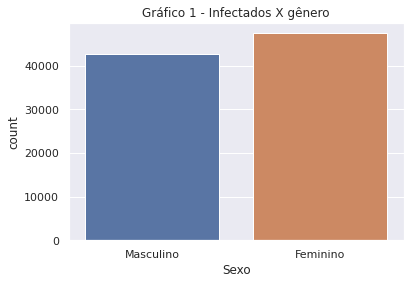

Feminino     0.526632
Masculino    0.473368
Name: Sexo, dtype: float64

In [7]:
sns.set()
sns.countplot(df['Sexo'])
plt.title('Gráfico 1 - Infectados X gênero')
plt.show()
df.Sexo.value_counts() / df.shape[0]

##Faixa Etária
A análise da faixa etária nos demonstra que há menor número de casos notificados entre os menores de 19 anos e maiores de 60 anos. Portanto, o maior número de infecções fica por dentro dessa faixa etária, conforme observado no Gráfico 2.


30 a 39 anos    0.271908
40 a 49 anos    0.223732
20 a 29 anos    0.188652
50 a 59 anos    0.136543
>= 60 anos      0.108794
<= 19 anos      0.070371
Name: Faixa Etária, dtype: float64

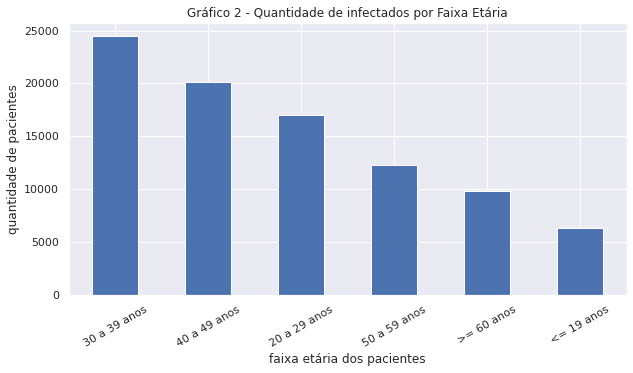

In [8]:

sns.set()
plt.figure(figsize=(10,5))
df['Faixa Etária'].value_counts().plot(kind='bar')
plt.xlabel('faixa etária dos pacientes')
plt.ylabel('quantidade de pacientes')
plt.title('Gráfico 2 - Quantidade de infectados por Faixa Etária')
plt.xticks(rotation=30)
df['Faixa Etária'].value_counts() / df.shape[0]


##Estado de saúde
No decorrer da análise, a estrutura disponibilizada pelo governo do GDF foi alterada. 
Havia uma variável chamada "Estado de Saúde", que mostrava se havia óbito ou se o paciente estava recuperado. Dessa variável, 20% dos valores não eram informados e 1% eram óbitos.

O novo dataframe veio com uma coluna chamada "Óbito", não havendo mais a separação por estado de saúde (recuperado ou óbito)

Além disso, houve a inclusão da variável "Dia dos primeiros sintomas".


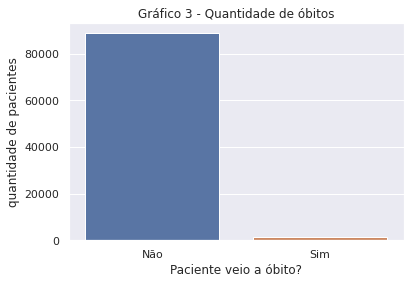

In [9]:
sns.set()
sns.countplot(df['Óbito'])
plt.xlabel('Paciente veio a óbito?')
plt.ylabel('quantidade de pacientes')
plt.title('Gráfico 3 - Quantidade de óbitos')
plt.xticks(rotation=0)
plt.show()

In [10]:
df['Óbito'].value_counts() / df['Óbito'].shape[0]

Não    0.98647
Sim    0.01353
Name: Óbito, dtype: float64

##Óbitos
Observa-se que o número de óbitos é maior no sexo masculino, representando 710 óbitos de homens (58%), em 29 de junho, apesar das mulheres serem 52% dos pacientes infectados.

No gráfico de faixa etária do sexo masculino, há um menor número de homens com idade entre >= 60 anos quando comparado ao número de mulheres, aproximadamente 68% do total. As mulheres nessa faixa etária representam 77% total, conforme evidenciado nos Gráficos 4 e 5.

Dessa forma, os homens mesmo sendo mais jovens, vêm mais à óbito, representando 58% do total de óbitos. Essa situação merece uma maior investigação.

Observa-se também que apesar dos idosos (pacientes > 60 anos) serem apenas 10% dos pacientes infectados, estes representam aproximadamente 73% dos óbitos, mostrando que há um **alto risco de mortalidade** nessa faixa etária, conforme evidenciado no Gráfico 6.

In [11]:
df1 = df[df["Óbito"] == "Sim"]

In [12]:
df1.Sexo.value_counts()

Masculino    710
Feminino     508
Name: Sexo, dtype: int64

In [13]:
df1.Sexo.value_counts() / df1.Sexo.shape[0]

Masculino    0.582923
Feminino     0.417077
Name: Sexo, dtype: float64

In [14]:
df9 = df1[df1["Sexo"] == "Feminino"]

In [15]:
df9['Faixa Etária'].value_counts() / df9['Faixa Etária'].shape[0]

>= 60 anos      0.769685
50 a 59 anos    0.110236
40 a 49 anos    0.066929
30 a 39 anos    0.037402
20 a 29 anos    0.011811
<= 19 anos      0.003937
Name: Faixa Etária, dtype: float64

In [16]:
df10 = df1[df1["Sexo"] == "Masculino"]
df10['Faixa Etária'].value_counts() / df10['Faixa Etária'].shape[0]

>= 60 anos      0.687324
50 a 59 anos    0.156338
40 a 49 anos    0.094366
30 a 39 anos    0.049296
20 a 29 anos    0.011268
<= 19 anos      0.001408
Name: Faixa Etária, dtype: float64

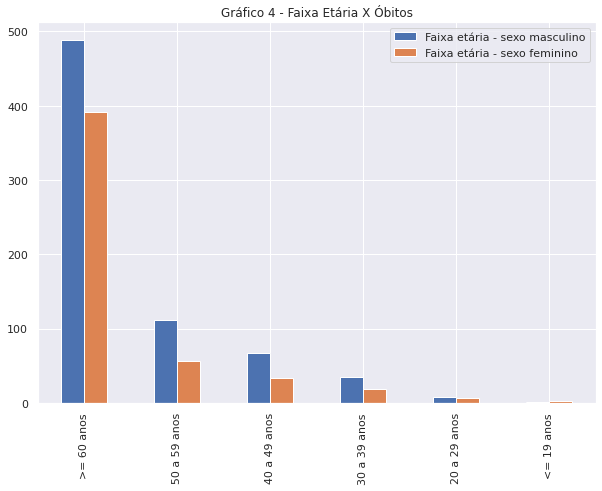

In [20]:
graf7 = pd.concat([(df10['Faixa Etária']).value_counts(), (df9['Faixa Etária']).value_counts()],axis=1).plot.bar(figsize=(10,7))
graf7.legend(["Faixa etária - sexo masculino", "Faixa etária - sexo feminino"])
graf7.set_title('Gráfico 4 - Faixa Etária X Óbitos');

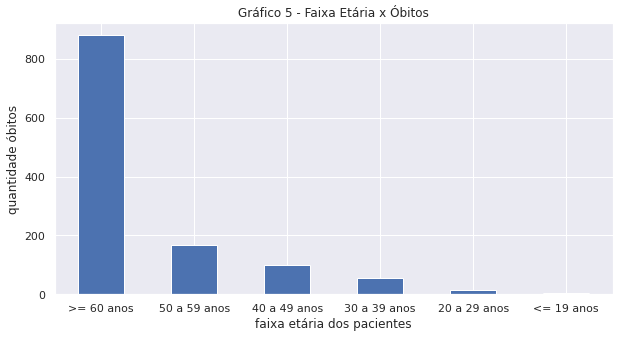

In [21]:
sns.set()
plt.figure(figsize=(10,5))
df1['Faixa Etária'].value_counts().plot(kind='bar')
plt.xlabel('faixa etária dos pacientes')
plt.ylabel('quantidade óbitos')
plt.title('Gráfico 5 - Faixa Etária x Óbitos');
plt.xticks(rotation=0)
df1['Faixa Etária'].value_counts() / df1['Faixa Etária'].shape[0]
plt.show()

In [22]:
df1['Faixa Etária'].value_counts() / df1['Faixa Etária'].shape[0]

>= 60 anos      0.721675
50 a 59 anos    0.137110
40 a 49 anos    0.082923
30 a 39 anos    0.044335
20 a 29 anos    0.011494
<= 19 anos      0.002463
Name: Faixa Etária, dtype: float64

##Comorbidades X Óbitos
Em relação aos óbitos, o Gráfico 7 demonstra que aproximadamente 87% dos pacientes que vieram a falecer possuiam algum tipo de comorbidade.

A análise ainda mostra que a maioria sofria das comorbidades do tipo "Distúrbios Metabólicos" e "Cardiovasculopatia",  conforme observado no Gráfico 8.

Cumpre destacar que esses pacientes podiam possuir 1 ou mais tipos de comorbidades.

In [23]:
df2 = df1[df1["Comorbidades"] == "Sim"]

In [ ]:
df12 = df1
df12['Comorbidades'].fillna("Não Informado", inplace=True);

In [25]:
df12['Comorbidades'].value_counts()


Sim              1065
Não Informado     153
Name: Comorbidades, dtype: int64

In [26]:
df12['Comorbidades'].value_counts() / df12['Comorbidades'].shape[0]

Sim              0.874384
Não Informado    0.125616
Name: Comorbidades, dtype: float64

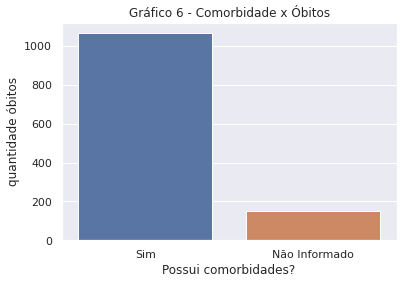

Sim              0.874384
Não Informado    0.125616
Name: Comorbidades, dtype: float64

In [98]:
sns.set()
sns.countplot(df12['Comorbidades'])
plt.xlabel('Possui comorbidades?')
plt.ylabel('quantidade óbitos')
plt.title('Gráfico 6 - Comorbidade x Óbitos')
plt.show();
df12.Comorbidades.value_counts()/df12.Comorbidades.shape[0]


In [80]:
df3 = ((df12.iloc[:,8:]).fillna("Não"))

In [81]:
df3 = df3.replace(["Sim"],1)

In [82]:
df3 = df3.replace(['Não'], 0)

In [86]:
df3 = df3.replace(['Não Informado'], 0)

In [87]:
df3.sum()

Comorbidades              1065
Pneumopatia                179
Nefropatia                 111
Doença Hematológica         10
Distúrbios Metabólicos     485
Imunossupressão            115
Obesidade                  139
Outros                     185
Cardiovasculopatia         753
dtype: int64

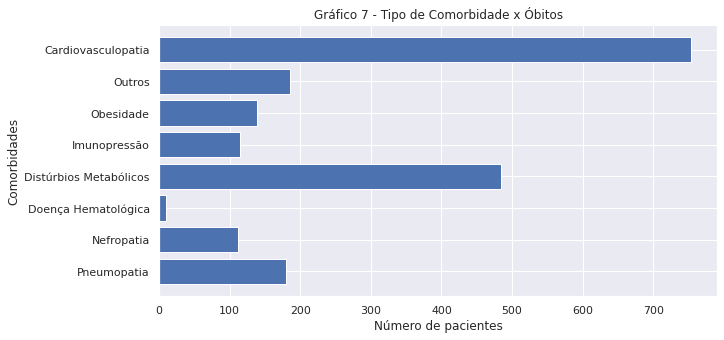

In [99]:
disease = ['Pneumopatia','Nefropatia','Doença Hematológica','Distúrbios Metabólicos','Imunopressão','Obesidade','Outros','Cardiovasculopatia']
n_disease = [179,111,10,485,115,139,185,753]

sns.set()
plt.figure(figsize=(10,5))
plt.barh(disease, n_disease);
plt.xlabel('Número de pacientes')
plt.ylabel('Comorbidades')
plt.title('Gráfico 7 - Tipo de Comorbidade x Óbitos');

##Análise temporal

Em relação a quantidade de infectados, a análise dos dados sugere ainda uma tendência de crescimento, concomitante com o crescimento de óbitos, conforme evidenciado nos Gráficos 9 e 10.



In [90]:
df8 = df

In [91]:
df8['Pacientes'] = 1

In [92]:
df8['Mês'] = df8['Data'].dt.month

In [93]:
df8.index = df8['Data Cadastro']

2020-07-06    2857
2020-06-29    2821
2020-06-28    2532
2020-07-05    2332
2020-06-18    2277
              ... 
2020-04-14      10
2020-04-08       8
2020-03-17       1
2020-03-01       1
2020-03-16       1
Name: Data Cadastro, Length: 131, dtype: int64

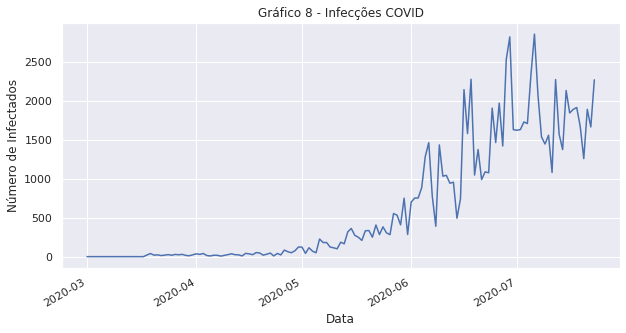

In [100]:
sns.set()
plt.figure(figsize=(10,5))
df8['Data Cadastro'].value_counts().plot()
plt.xlabel("Data")
plt.ylabel("Número de Infectados")
plt.title('Gráfico 8 - Infecções COVID')
df8['Data Cadastro'].value_counts() 

2020-07-07    57
2020-07-03    35
2020-07-01    34
2020-06-30    33
2020-06-23    31
              ..
2020-05-12     1
2020-03-28     1
2020-04-12     1
2020-04-09     1
2020-05-01     1
Name: Data Cadastro, Length: 103, dtype: int64

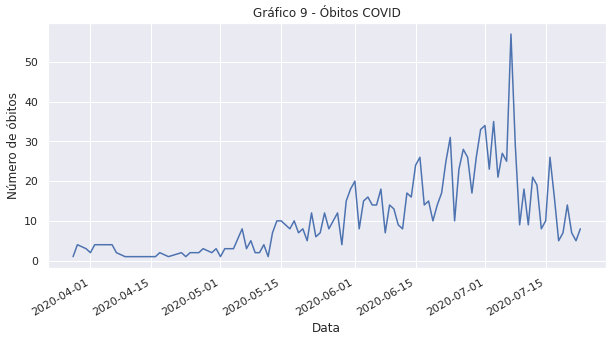

In [101]:
sns.set()
plt.figure(figsize=(10,5))
df1['Data Cadastro'].value_counts().plot()
plt.xlabel("Data")
plt.ylabel("Número de óbitos")
plt.title('Gráfico 9 - Óbitos COVID')
df1['Data Cadastro'].value_counts() 


##Conclusões
No recente cenário de pandemia mundial, Brasília também se encontra em número crescente de infectados e óbitos.

Nesse estudo, observamos que o número de óbitos é maior entre os que possuem comorbidades (87%) e apesar do fato de a faixa Etária dos infectados com idade acima de 60 anos representar 10% dos infectados totais, eles representam 73% dos óbitos.

Também observou-se que apesar dos números de infectados serem semelhantes entre homens e mulheres, os homens vão mais a óbito, representando 58% dos falecimentos.

Dentre as comorbidades que estão mais relacionadas com os óbitos estão a Cardiovasculopatia e os Distúrbios Metabólicos.

Cumpre salientar que no antigo dataframe disponibilizado pelo GDF havia a variável "Estados de saúde"  com 20% dos valores não informados. No dataframe atual, foi incluído a variável 'óbito' e 'dia dos primeiros sintomas'.

Este estudo demonstra algumas análises que se pode extrair dos dados brutos abertos disponibilizados pelo Governo do Distrito Federal.

Esse estudo será atualizado semanalmente.

Carmen Scartezini, Accountant & Data Analyst.